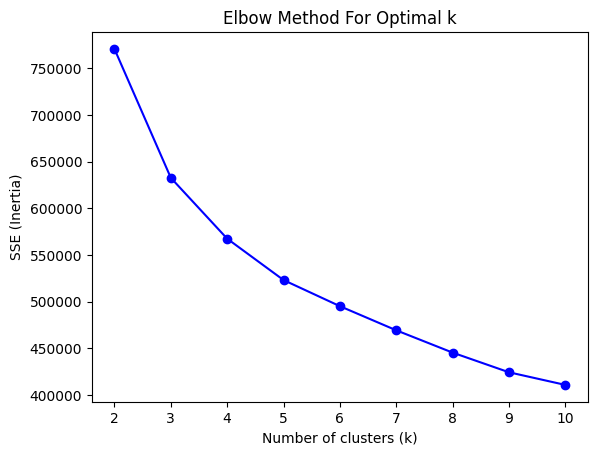

In [3]:
sse = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method For Optimal k")
plt.show()


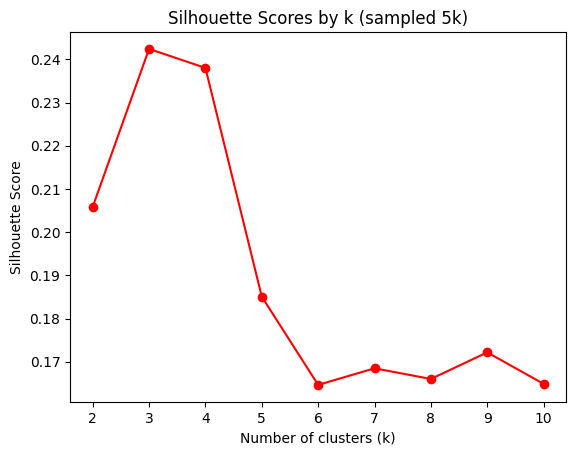

In [2]:
from sklearn.utils import resample

sil_scores = []
K = range(2, 11)

# Take a smaller sample for silhouette calculation
X_sample = resample(X, n_samples=5000, random_state=42)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    sil = silhouette_score(X_sample, labels)
    sil_scores.append(sil)

plt.plot(K, sil_scores, 'ro-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores by k (sampled 5k)")
plt.show()


In [6]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import joblib

# -----------------------
# STEP 1: Train final KMeans model
# -----------------------
best_k = 4   # 👈 change this after you check Elbow & Silhouette plots

final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels = final_kmeans.fit_predict(X)   # X = your scaled features DataFrame

# -----------------------
# STEP 2: Save model
# -----------------------
os.makedirs("../models", exist_ok=True)   # ensure models folder exists
joblib.dump(final_kmeans, "../models/kmeans_model.pkl")

# -----------------------
# STEP 3: Attach cluster labels to original dataset
# -----------------------
df = pd.read_csv(r"C:\Users\luna love\Downloads\Project4\data\single_genre_artists.csv")
df['cluster'] = labels

# -----------------------
# STEP 4: Save clustered dataset
# -----------------------
os.makedirs("../reports", exist_ok=True)   # ensure reports folder exists
df.to_csv("../reports/amazon_music_clusters.csv", index=False)

print(f"✅ Final KMeans model trained with k = {best_k}")
print("✅ Model saved to ../models/kmeans_model.pkl")
print("✅ Clustered dataset saved to ../reports/amazon_music_clusters.csv")


✅ Final KMeans model trained with k = 4
✅ Model saved to ../models/kmeans_model.pkl
✅ Clustered dataset saved to ../reports/amazon_music_clusters.csv


In [7]:
print("Silhouette Score (final):", silhouette_score(X_sample, final_kmeans.predict(X_sample)))
from sklearn.metrics import davies_bouldin_score
print("Davies-Bouldin Index:", davies_bouldin_score(X, labels))


Silhouette Score (final): 0.23677148829158404
Davies-Bouldin Index: 1.5118933666945666
